In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/sample_data/Sample - Superstore.csv',encoding='latin-1')

# Preview the data
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Months           0
dtype: int64


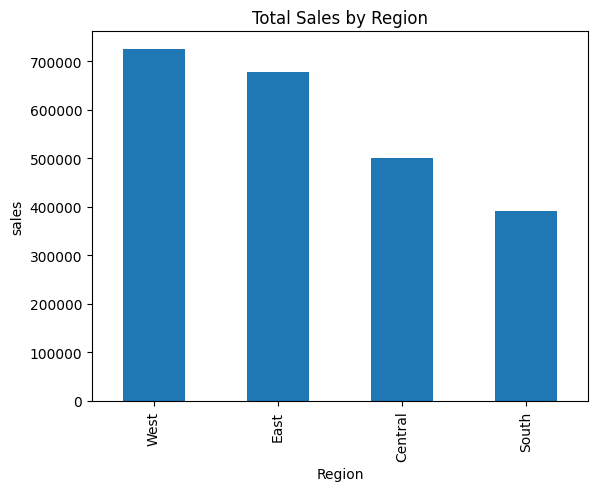

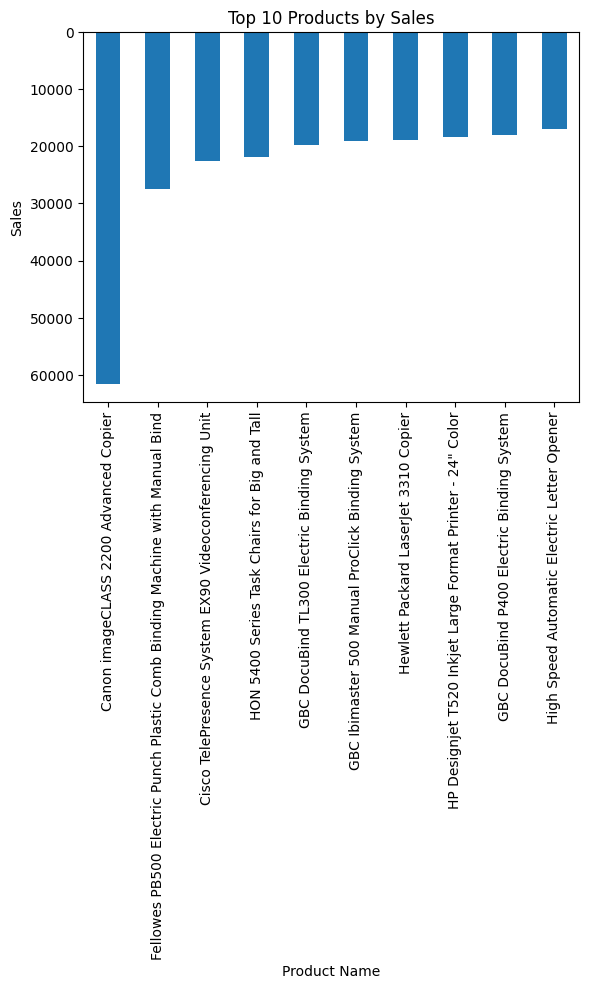

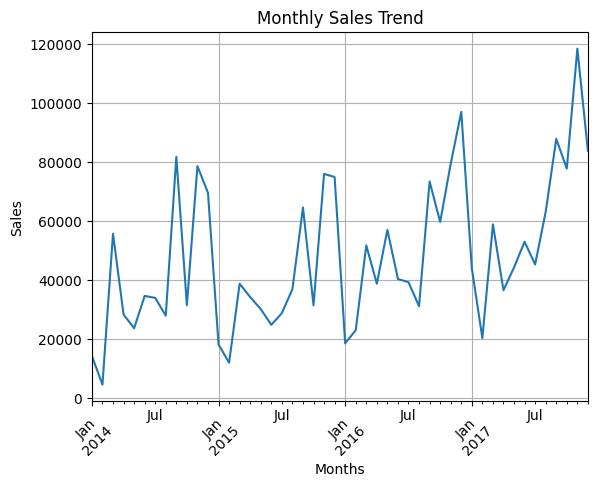

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
#check for missing values
print(df.isnull().sum())
# Total sales by region
region_sales=df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
region_sales.plot(kind='bar',title='Total Sales by Region', xlabel='Region', ylabel='sales')
plt.show()
# Top 10 products by sales
top_products=df.groupby("Product Name")['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar',title='Top 10 Products by Sales',xlabel='Product Name',ylabel='Sales')
plt.gca().invert_yaxis()
plt.show()
# Monthly sales trend
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Months']=df['Order Date'].dt.to_period('M')
monthly_sales=df.groupby('Months')["Sales"].sum()
monthly_sales.plot(kind='line',title='Monthly Sales Trend',xlabel='Months',ylabel='Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

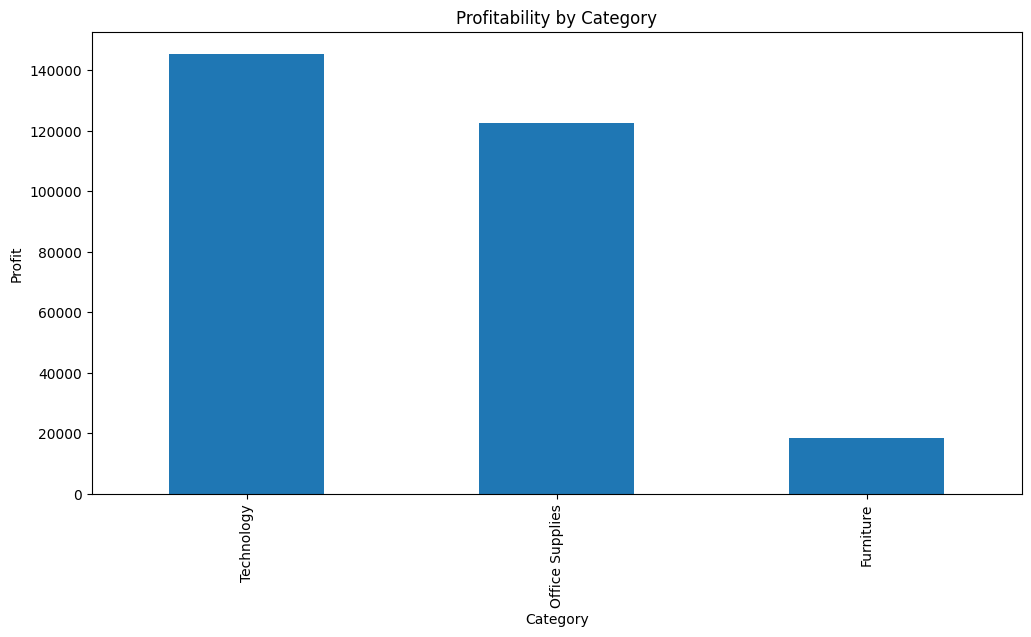

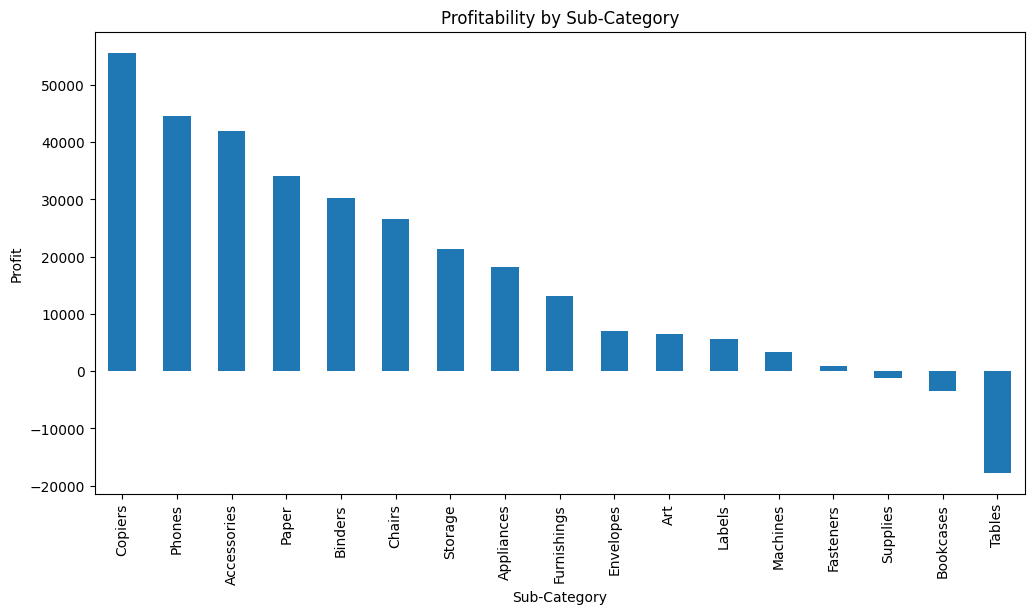

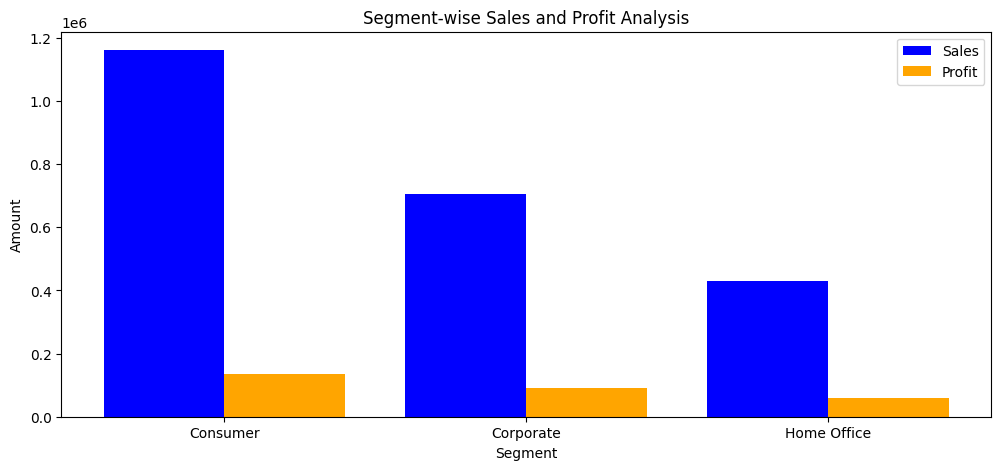

In [15]:
#Profitability by Category and Sub-Category
plt.figure(figsize=(12,6))
cat_profit=df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
cat_profit.plot(kind='bar', title='Profitability by Category',xlabel='Category',ylabel='Profit')
plt.show()

plt.figure(figsize=(12,6))
sub_profit=df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
sub_profit.plot(kind='bar',title='Profitability by Sub-Category',xlabel='Sub-Category',ylabel='Profit')
plt.show()

#Segment-wise Sales and Profit Analysis
plt.figure(figsize=(12,5))
seg_sales=df.groupby('Segment')['Sales'].sum()
seg_profit=df.groupby('Segment')['Profit'].sum()
bar_width=0.4
index=range(len(seg_sales))
plt.bar(index,seg_sales,bar_width,label='Sales', color='blue')
plt.bar([i + bar_width for i in index],seg_profit, bar_width, color='orange',label='Profit')
plt.xlabel('Segment')
plt.ylabel('Amount')
plt.title('Segment-wise Sales and Profit Analysis')
plt.xticks([i+bar_width/2 for i in index],seg_sales.index)
plt.legend()
plt.show()



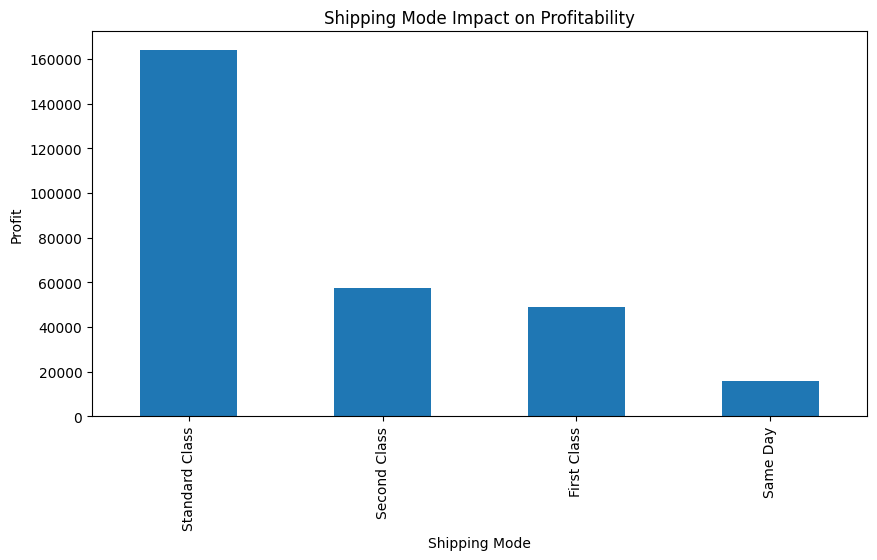

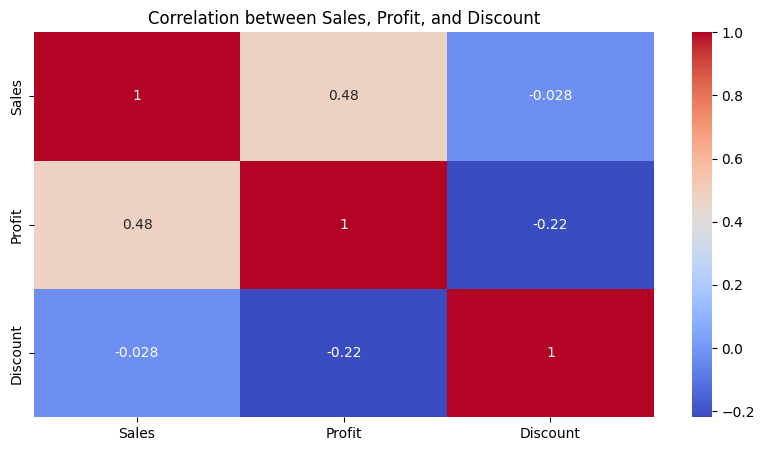

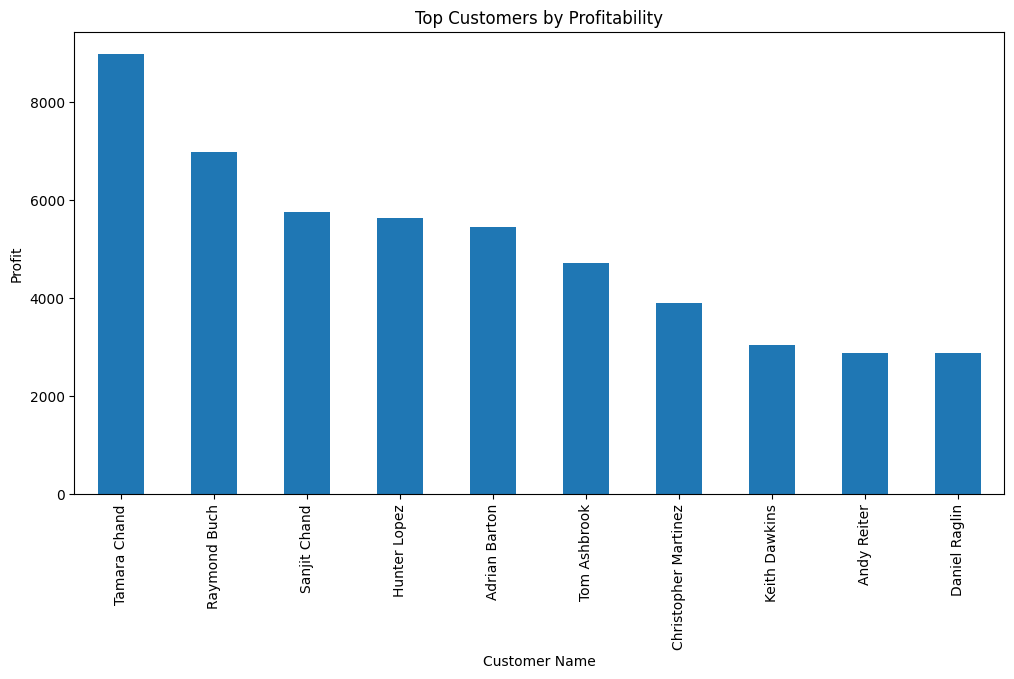

In [27]:
#Shipping Mode Impact on Profitability
plt.figure(figsize=(10,5))
ship_profit=df.groupby('Ship Mode')['Profit'].sum().sort_values(ascending=False)
ship_profit.plot(kind='bar',title='Shipping Mode Impact on Profitability',xlabel='Shipping Mode',ylabel='Profit')
plt.show()

# Correlation between Sales, Profit, and Discount
plt.figure(figsize=(10,5))
corr=df[['Sales','Profit','Discount']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation between Sales, Profit, and Discount')
plt.show()

#Top Customers by Profitability
plt.figure(figsize=(12,6))
top_cust=df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_cust.plot(kind='bar',title='Top Customers by Profitability',xlabel='Customer Name',ylabel='Profit')
plt.show()
